## Calculating SFD and BMD for a Simply Supported Beam ##


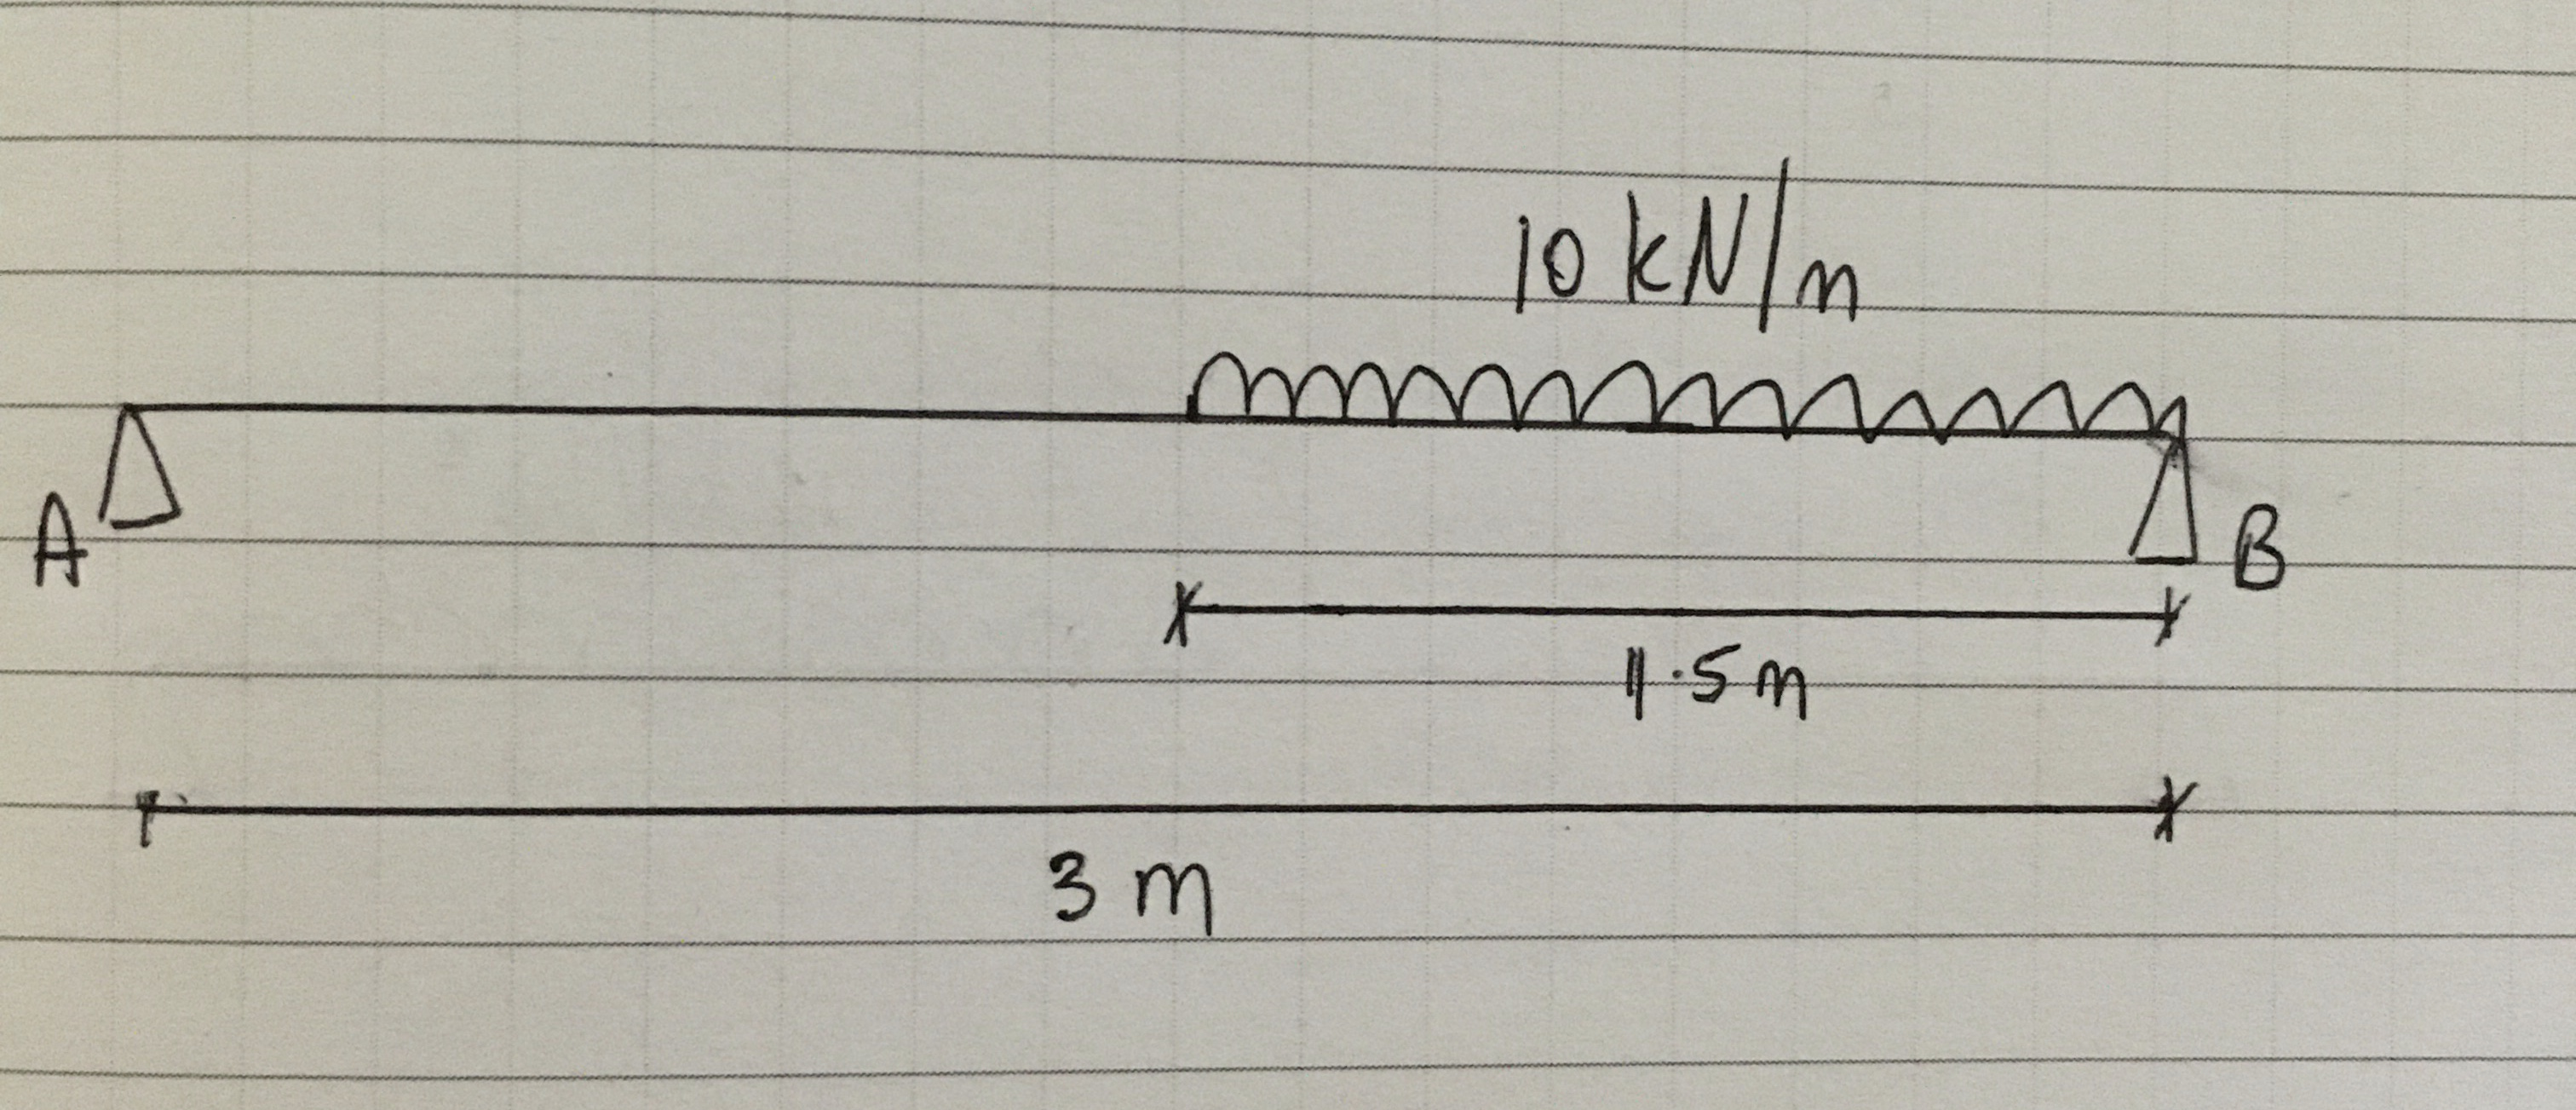

**apply_load(value, start, order, end=None)**

- value : The magnitude of an applied load.

- start : The starting point of the applied load. For point moments and point forces this is the location of application.

- order : Integer
-  The order of the applied load.
-  For moments, order = -2
-  For point loads, order =-1
-  For constant distributed load, order = 0
-  For ramp loads, order = 1
-  For parabolic ramp loads, order = 2
-  … so on.

- end : Sympifyable, optional
-  An optional argument that can be used if the load has an end point within the length of the beam.


**References**

https://docs.sympy.org/latest/modules/physics/continuum_mechanics/beam.html#

https://www.youtube.com/watch?v=InfGrRCBWaE&list=PLg38CllHviwLp4HqqTvoNhdk9mwKCf5QS&index=102&t=214s

https://quantumnovice.github.io/Beam-Theory-Calculus-with-Python.html

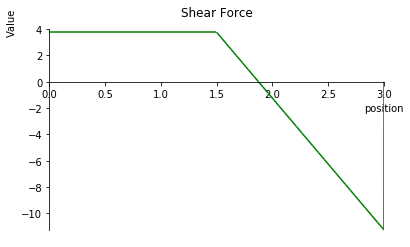

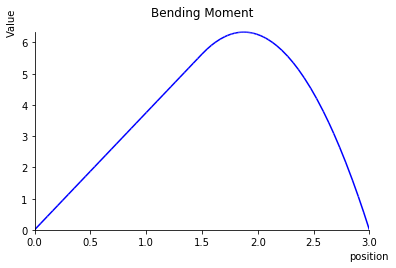

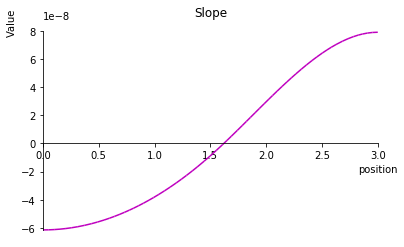

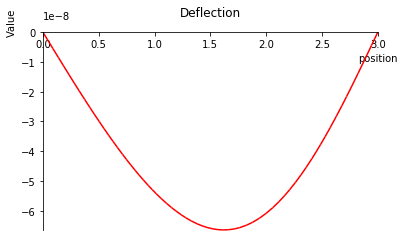

(3, 11.2500000000000)
(1.87500000000000, 6.32812500000000)


In [3]:
# Importing SymPy modules
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import *

# Declaring E and I as variables for modulus of elasticity (E) and moment of inertia (I).
E, I = symbols('E, I')

E = 200*(10**9)
I = 400*(10**-6)

# Declare b1 as variable for beam. 
# Setting parameters for b1 in the form of a tuple (length, E, I)
b1 = Beam(3, E, I)

# Declare RA and RB as variables for reactions at supports A and B. 
RA, RB = symbols('RA, RB')

# Applying loads to beam as a tuple. apply_load(value, start, order, end)
# See notes above.
# Applying reaction loads.
b1.apply_load(RA, 0, -1)
b1.apply_load(RB, 3, -1)

# Applying UDL.
b1.apply_load(-10, 1.5, 0, end=3)

# Applying boundary conditions for deflection; coordinates of start and end of beam.
b1.bc_deflection = [(0, 0), (3, 0)]

# This provides the singularity equation for the beam.
b1.load

# Solving for reaction forces at support.
b1.solve_for_reaction_loads(RA, RB)

b1.reaction_loads

b1.plot_shear_force()
b1.plot_bending_moment()
b1.plot_slope()
b1.plot_deflection()

# Print max shear force and its location on beam
print(b1.max_shear_force())

# Print max bending moment and its location on beam.
print(b1.max_bmoment())





In [11]:
b1.reaction_loads

{RA: 3.75000000000000, RB: 11.2500000000000}